<a href="https://colab.research.google.com/github/DavidSaruni/Learning-Tensorflow/blob/main/Deep_Learning(Neural_network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf
import seaborn as sn



Load the mnist dataset

In [2]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
Y_train.shape
(60000,28,28)

(60000, 28, 28)

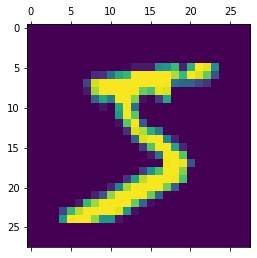

In [20]:
plt.matshow(X_train[0])

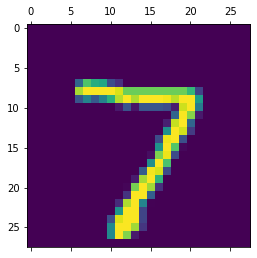

In [21]:
plt.matshow(X_test[0])

In [22]:
Y_train[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

Scaling the Values

In [23]:
X_train=X_train/255
X_test=X_test/255

Flattening the array images size 28*28 two dimensional array

In [24]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [25]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Training without hidden layers

In [26]:
model=keras.Sequential([
      keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.8754
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9260


In [27]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9261


[0.2672739624977112, 0.9261000156402588]

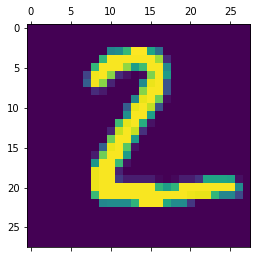

In [28]:
plt.matshow(X_test[1])

In [29]:
Y_predict=model.predict(X_test_flattened)
Y_predict[1]

array([3.3078840e-01, 3.4451783e-03, 9.9903125e-01, 3.3662611e-01,
       4.5831181e-10, 7.8158474e-01, 8.1698287e-01, 7.0489182e-13,
       1.0690728e-01, 1.0095181e-09], dtype=float32)

Gives the maximum predicted value

In [30]:
np.argmax(Y_predict[1])

2

In [32]:
Y_predicted_labels=[np.argmax(i) for i in Y_predict]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Creating a confusion matrix

In [35]:
cm=tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    1,    0,    5,    4,    3,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   7,    8,  927,   17,    9,    3,   12,    9,   35,    5],
       [   4,    0,   18,  920,    1,   26,    2,    9,   22,    8],
       [   2,    1,    5,    1,  922,    0,    6,    3,   10,   32],
       [   9,    3,    4,   31,   11,  777,   13,    6,   31,    7],
       [  13,    3,    8,    1,    9,   14,  904,    2,    4,    0],
       [   1,    5,   25,    6,    8,    1,    0,  938,    2,   42],
       [   6,    7,    8,   17,    9,   20,    8,   10,  879,   10],
       [  11,    7,    1,    9,   30,    6,    0,   17,    6,  922]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

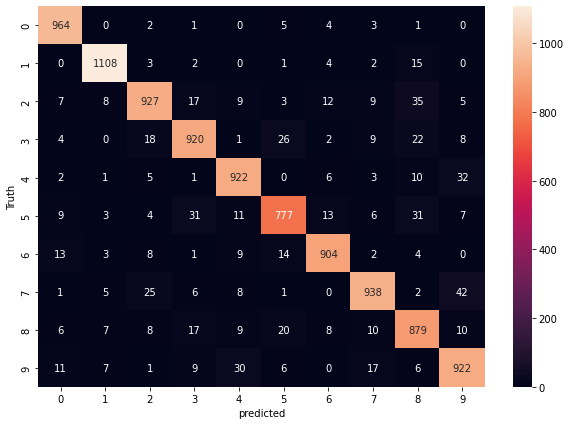

In [36]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

Adding hidden layers

In [37]:
model=keras.Sequential([
    keras.layers.Dense(16, input_shape=(784,),activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6341 - accuracy: 0.7983
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2821 - accuracy: 0.9178
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2230 - accuracy: 0.9348
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1895 - accuracy: 0.9438
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1744 - accuracy: 0.9496
